## Import libraries and read the data

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

FIG_SIZE = (15, 6)
NAME = "scalability-cev"
df = pd.read_parquet(f"../results/{NAME}.parquet")

PLOTS_DIR = Path("../plots") / NAME
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

# rename versions
df["Version"] = df["Version"].replace({
    "aa": "anti-affinity",
    "pp": "path-protection",
    "rel": "reliability",
})
VERSIONS = df["Version"].unique()

print("Shape", df.shape)
print(df.groupby(["Version", "Output"]).size())

FONT_SIZE = "x-large"

Shape (250, 15)
Version          Output 
all              success    36
                 timeout    14
anti-affinity    success    36
                 timeout    14
path-protection  success    50
plain            success    50
reliability      success    50
dtype: int64


In [13]:
df_success = df[~df['Output'].isin(['no_result', 'timeout'])]
df_timeout = df[df['Output'] == 'timeout']
df_no_result = df[df['Output'] == 'no_result']
df_fail = df[df['Output'].isin(['no_result', 'timeout'])]

# remove all the rows where Nodes is in [16, 32]
# TO_REMOVE = [16, 32]
# df_success = df_success[~df_success['Nodes'].isin(TO_REMOVE)]
# df_fails = df_fails[~df_fails['Nodes'].isin(TO_REMOVE)]

print("SUCCESS", df_success.shape)
print("TIMEOUT", df_timeout.shape)
print("NO RESULT", df_no_result.shape)

SUCCESS (222, 15)
TIMEOUT (28, 15)
NO RESULT (0, 15)


# EXECUTION TIMES

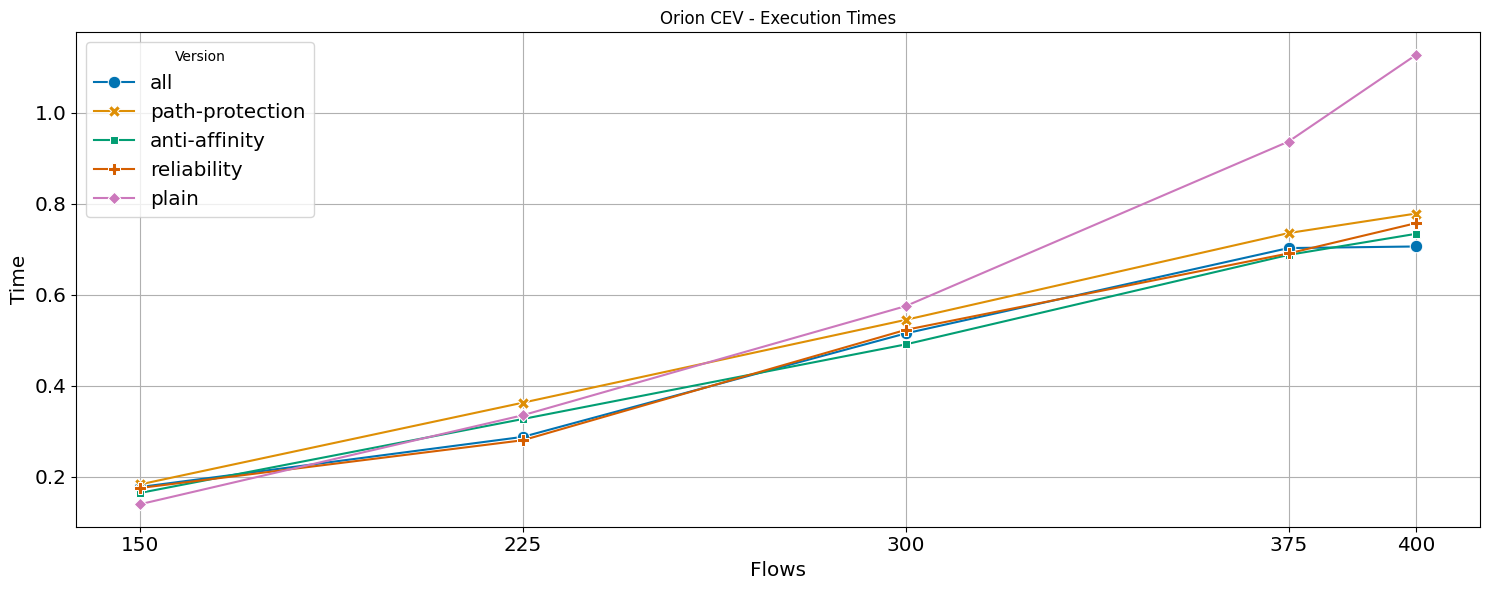

In [ ]:
plt.figure(figsize=FIG_SIZE)

sns.lineplot(
    data=df_success,
    x="Flows",
    y="Time",
    hue="Version",
    style="Version",
    markers=True,
    markersize=9,
    errorbar=None,
    dashes=False,
    palette="colorblind",
)

plt.xticks([150, 225, 300, 375, 400])

plt.title(f"Orion CEV - Execution Times")
plt.xlabel('Flows', fontsize=FONT_SIZE)
plt.ylabel('Time', fontsize=FONT_SIZE)
plt.legend(title="Version", fontsize=FONT_SIZE)
plt.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
plt.grid(True)

plt.tight_layout()
plt.savefig(PLOTS_DIR / "execution-times.pdf", format='pdf', dpi=600)
plt.show()

/tmp/ipykernel_1008699/3019271423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_success["Time_Per_Flow"] = (df_success["Time"] / df_success["Flows"]) * 1000


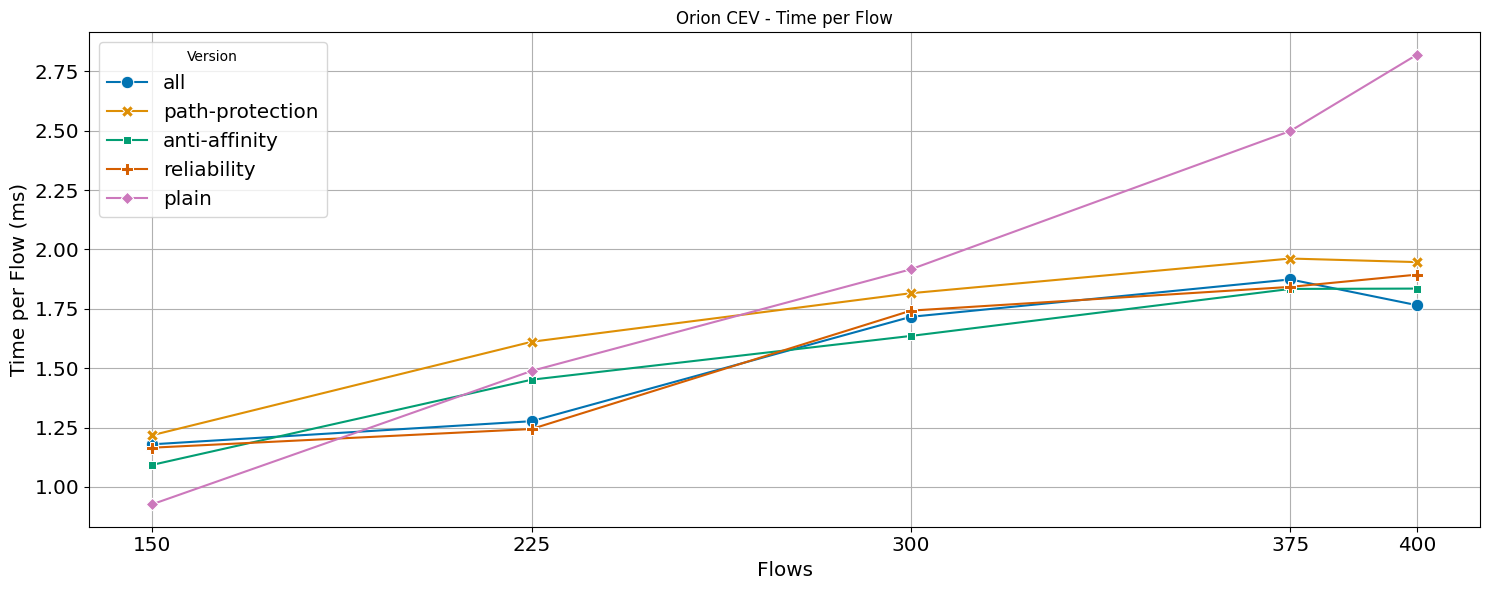

In [ ]:
plt.figure(figsize=FIG_SIZE)
df_success["Time_Per_Flow"] = (df_success["Time"] / df_success["Flows"]) * 1000

sns.lineplot(
    data=df_success,
    x="Flows",
    y="Time_Per_Flow",
    hue="Version",
    style="Version",
    markers=True,
    markersize=9,
    errorbar=None,
    dashes=False,
    palette="colorblind",
)

plt.xticks([150, 225, 300, 375, 400])

plt.title(f"Orion CEV - Time per Flow")
plt.xlabel('Flows', fontsize=FONT_SIZE)
plt.ylabel('Time per Flow (ms)', fontsize=FONT_SIZE)
plt.legend(title="Version", fontsize=FONT_SIZE)
plt.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
plt.grid(True)

plt.tight_layout()
plt.savefig(PLOTS_DIR / "time-per-flow.pdf", format='pdf', dpi=600)
plt.show()

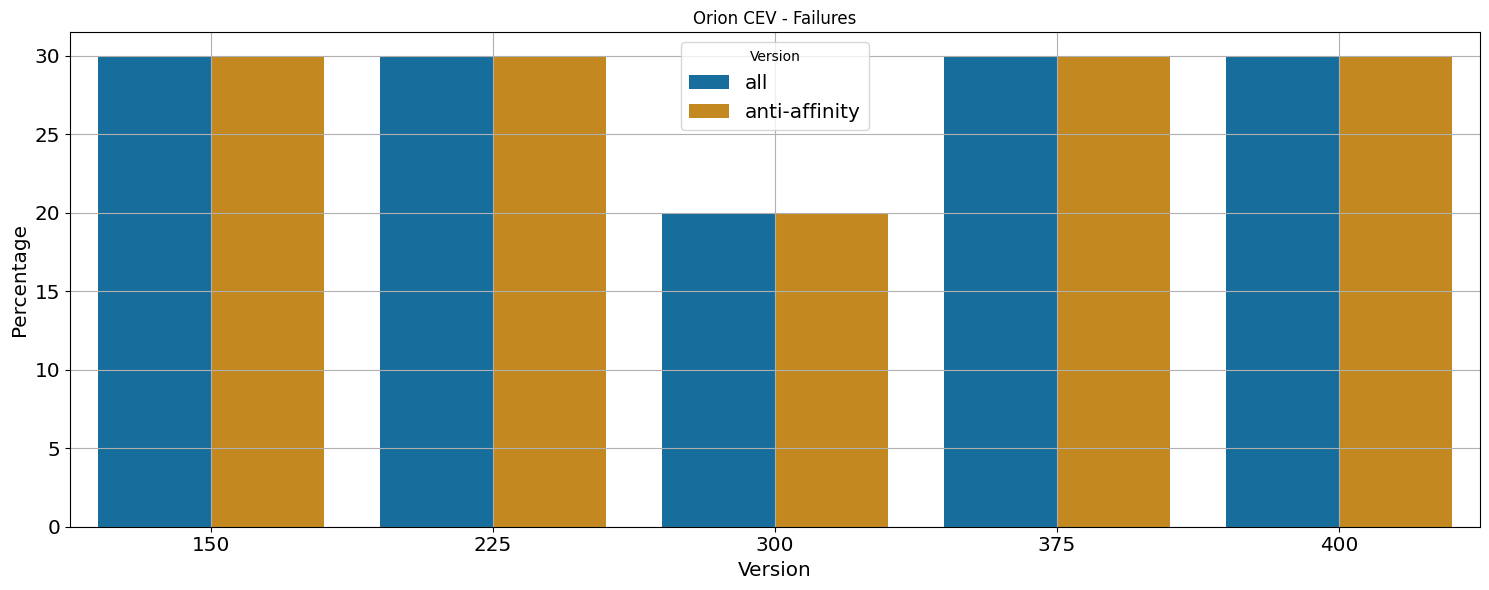

In [16]:
# barplot with number of failures always per version
df_grouped = df_fail.copy()
df_grouped = df_grouped.groupby(["Version", "Flows"]).size().reset_index(name="Count")
df_tot = df.groupby(["Version", "Flows"]).size().reset_index(name="Count")

df_grouped["Percentage"] = df_grouped["Count"] / df_tot["Count"] * 100

df_tot, df_grouped

plt.figure(figsize=FIG_SIZE)
sns.barplot(
    data=df_grouped,
    x="Flows",
    y="Percentage",
    hue="Version",
    palette="colorblind",
)

plt.title(f"Orion CEV - Failures")
plt.xlabel('Version', fontsize=FONT_SIZE)
plt.ylabel('Percentage', fontsize=FONT_SIZE)
plt.legend(title="Version", fontsize=FONT_SIZE)
plt.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
plt.grid(True)

plt.tight_layout()
plt.savefig(PLOTS_DIR / "failures.pdf", format='pdf', dpi=600)
plt.show()